In [1]:
# Task1

import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt
import csv

#Specify the initial page to crawl
base_url = 'http://comp20008-jh.eng.unimelb.edu.au:9889/main/'
seed_item = 'index.html'

seed_url = base_url + seed_item
page = requests.get(seed_url)
soup = BeautifulSoup(page.text, 'html.parser')

visited = {}; 
visited[seed_url] = True
pages_visited = 1
# print(seed_url)

# Remove index.html
links = soup.findAll('a')
seed_link = soup.findAll('a', href=re.compile("^index.html"))
# to_visit_relative = list(set(links) - set(seed_link))
to_visit_relative = [l for l in links if l not in seed_link]

# Resolve to absolute urls
to_visit = []
for link in to_visit_relative:
    to_visit.append(urljoin(seed_url, link['href']))
    
web_url = []

#Find all outbound links on succsesor pages and explore each one 
while (to_visit):
        
    # consume the list of urls
    link = to_visit.pop(0)
#     print(link)
    web_url.append(link)
    
    # need to concat with base_url, an example item <a href="catalogue/sharp-objects_997/index.html">
    page = requests.get(link)
    
    # scarping code goes here
    soup = BeautifulSoup(page.text, 'html.parser')
    
    # mark the item as visited, i.e., add to visited list, remove from to_visit
    visited[link] = True
    to_visit
    new_links = soup.findAll('a')
    for new_link in new_links :
        new_item = new_link['href']        
        new_url = urljoin(link, new_item)
        if new_url not in visited and new_url not in to_visit:
            to_visit.append(new_url)
        
    pages_visited = pages_visited + 1

# print('\nvisited {0:5d} pages; {1:5d} pages in to_visit'.format(len(visited), len(to_visit)))
# print('{0:1d}'.format(pages_visited))

url_headline = []

for i in range(len(web_url)):
    content=requests.get(web_url[i]).text
    soup = BeautifulSoup(content, 'html.parser')#use html to parse
    
    #get the headline
    for j in range(0,len(soup.findAll('h1'))):
        label = soup.findAll('h1')[j].string
        url_headline.append([web_url[i], label])
        
# create the csv file
with open ("task1.csv", 'a', newline = '') as f:
    writer = csv.writer(f)
    writer.writerow(['url', 'headline'])
    for i in range(len(url_headline)):
        writer.writerow(url_headline[i])

In [2]:
#Task2
#a

import json

player_list = []
name_list = []
text_list = []
player = []
player_clean_list = []
url_player = []

# load json
with open ("tennis.json", 'r', encoding = 'UTF-8') as f:
    load_dict = json.load(f)
    
# get players' name from json file  
for i in range(len(load_dict)):
    player_list.append(load_dict[i]["name"])

# split names 
for name in range(len(player_list)):
    name_list.append(player_list[name].title().split())
    
# split the texts so i can find players' names in the text by using name_list
for i in range(len(web_url)):
    content=requests.get(web_url[i]).text
    soup = BeautifulSoup(content, 'html.parser')#用html解析
    text = [soup.findAll('p')[j].string.split() for j in range(0,len(soup.findAll('p')))]#提取内容
    text_list.append(web_url[i])
    for a in range(len(text)):
        for b in range(1, len(text[a])):
            text_list.append([text[a][b - 1], text[a][b]])
            
# remove all the punctuations
for i in text_list:
    if len(i) == 2:
        for c in range(len(i)):
            i[c] = i[c].replace("(", '')
            i[c].split()
            i[c] = i[c].replace('"', '')
            i[c].split()
            i[c] = i[c].replace(')', '')
            i[c].split()
            i[c] = i[c].replace(',', '')
            i[c].split()
            i[c] = i[c].replace('.', '')
            i[c].split()

# get the name and the corresponding web_url           
for c in range(len(text_list)):
    if len(text_list[c]) > 20:
        player.append(text_list[c])
    elif text_list[c] in name_list:
        player.append(text_list[c])

# get the first named player in each article with the corresponding web_url
for a in range(1, len(player)):
    player_clean_list.append([player[a - 1], player[a]])

for i in range(len(player_clean_list)):
    if len(player_clean_list[i][0]) > 20 and len(player_clean_list[i][1]) < 5:
        url_player.append(player_clean_list[i])

for i in range(len(url_player)):
    for j in range(len(url_player[i])):
        for w in range(len(player_list)):
            if url_player[i][j] == name_list[w]:
                url_player[i][j] = player_list[w].title()

url_player 

[['http://comp20008-jh.eng.unimelb.edu.au:9889/main/Bplayers099.html',
  'Jeremy Bates'],
 ['http://comp20008-jh.eng.unimelb.edu.au:9889/main/enmanove001.html',
  'Tim Henman'],
 ['http://comp20008-jh.eng.unimelb.edu.au:9889/main/edererwi098.html',
  'Roger Federer'],
 ['http://comp20008-jh.eng.unimelb.edu.au:9889/main/afinslum002.html',
  'Marat Safin'],
 ['http://comp20008-jh.eng.unimelb.edu.au:9889/main/erreroey003.html',
  'Rainer Schuettler'],
 ['http://comp20008-jh.eng.unimelb.edu.au:9889/main/gassiint096.html',
  'Andre Agassi'],
 ['http://comp20008-jh.eng.unimelb.edu.au:9889/main/oddickin004.html',
  'Andy Roddick'],
 ['http://comp20008-jh.eng.unimelb.edu.au:9889/main/enmanhop095.html',
  'Tim Henman'],
 ['http://comp20008-jh.eng.unimelb.edu.au:9889/main/ederercl005.html',
  'Roger Federer'],
 ['http://comp20008-jh.eng.unimelb.edu.au:9889/main/njuredRo094.html',
  'Andy Roddick'],
 ['http://comp20008-jh.eng.unimelb.edu.au:9889/main/oungdebu006.html',
  'Robby Ginepri'],
 ['http

In [3]:
# Task2(b)

score = []
url_score = []
player_score = []

# find the first match score
for i in web_url:
    content=requests.get(i).text
    soup = BeautifulSoup(content, 'html.parser') #use html to parse
    article = soup.find('div', id = "articleDetail")
    pattern = r'(\(?[\d]+-[\d]+\)? *){2,5}'
    pattern_search = re.search(pattern, article.text)
    if(pattern_search):
        score = pattern_search.group().split()
        url_score.append([i, score])

total_list = []
player_score = []

# combine the web_url and the corresponding headline, player name and first match score
for a in range(len(url_headline)):
    for b in range(len(url_player)):
        for c in range(len(url_score)):
            if url_headline[a][0] == url_player[b][0] and url_headline[a][0] == url_score[c][0]:
                total_list.append([url_headline[a][0], url_headline[a][1], url_player[b][1], url_score[c][1]])
                player_score.append([url_headline[a][0], url_score[c][1]])

# create csv file
with open ("task2.csv", 'a', newline = '') as f:
    writer = csv.writer(f)
    writer.writerow(['url', 'headline', 'player', 'score'])
    for i in range(len(total_list)):
        writer.writerow(total_list[i])

In [6]:
# Task3

avg_game_difference = []
avg_game_difference_file = []

# rearrange the score if it is included in a bracket
for i in range(len(player_score)):
    for j in range(len(player_score[i][1])):
        if player_score[i][1][j][0] == "(":
            player_score[i][1][j] = player_score[i][1][j][1:-1]

# calculate the game difference
for i in range(len(player_score)):
    for j in range(len(player_score[i][1])):
        number = player_score[i][1][j].split("-")
        player_score[i].append(int(number[0]) - int(number[1]))

# calculate the average game difference
for i in range(len(player_score)):
    avg_game_difference.append([player_score[i][0], sum(player_score[i][2:])/len(player_score[i][2:])])

# put player's name the corresponding average game difference together        
for i in url_player:
    for j in avg_game_difference:
        if i[0] == j[0]:
            j[0] = i[1]
            
# clean the duplicated lists in the avg_game_difference
for i in avg_game_difference:
    if i not in avg_game_difference_file:
        avg_game_difference_file.append(i)
        
# create the csv file
with open ("task3.csv", 'a', newline = '') as f:
    writer = csv.writer(f)
    writer.writerow(['player', 'avg_game_difference'])
    for i in range(len(avg_game_difference_file)):
        writer.writerow(avg_game_difference_file[i])


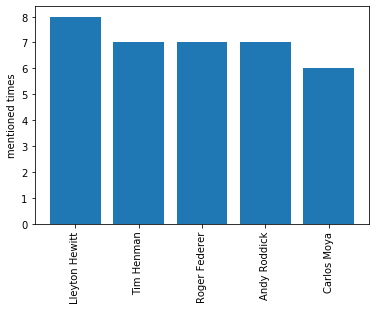

In [7]:
# Task 4

mention_player = []
d1 = {}
column = []
data = []

for i in range(len(url_player)):
    mention_player.append(url_player[i][1])

# calculate the number of time each player is mentioned
for word in mention_player:
    d1[word] = d1.get(word,0) +1
itemli =sorted(d1.items(), key=lambda x:x[1],reverse=True)

# find the five most frequently mentioned players
for i in range(len(itemli[0:5])):
    column.append(itemli[i][0])
    
for i in range(len(itemli[0:5])):
    data.append([itemli[i][0], itemli[i][1]])

# create a dataframe for plotting
column_names = ['player', 'mentioned times']
time = pd.DataFrame(data, columns = column_names)

plt.xticks(rotation='vertical')
plt.bar(time['player'], time['mentioned times'])
plt.ylabel('mentioned times')
plt.savefig("task4.png") 
plt.show()

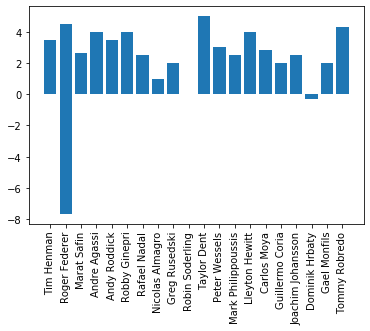

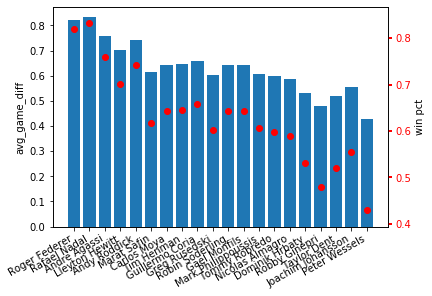

In [9]:
# Task 5

winpct = []

# load json file
with open ("tennis.json", 'r', encoding = 'UTF-8') as f:
    load_dict = json.load(f)

# find player's name and corresponding win percetage
for i in range(len(load_dict)):
    winpct.append([load_dict[i]["name"].title(), load_dict[i]["wonPct"]])

# remove the elements in the list if the element does not appear in the avg_game_difference_file list
player_winpct = []
name_winpct = []
for i in winpct:
    for k in avg_game_difference_file:
        if i[0] == k[0]:
            player_winpct.append([k[0], i[1]])
for i in player_winpct:
    if i not in name_winpct:
        name_winpct.append(i)

# combine player's name and corresponding win percentage and average game difference together
winpct_avg = []
for i in range(len(name_winpct)):
    winpct_avg.append([name_winpct[i][0], name_winpct[i][1], avg_game_difference_file[i][1]])

# let the win percentage divide by 100 for the ploting
for i in winpct_avg:
    i[1] = i[1][:-1]
for i in winpct_avg:
    i[1] = float(i[1])/100

# create the dataframe for ploting the graph
column_names = ['player', 'avg_win_diff']
win_avg = pd.DataFrame(avg_game_difference_file, columns = column_names)

# plot the graph
plt.xticks(rotation='vertical')
plt.bar(win_avg['player'], win_avg['avg_win_diff'])

x = []
y1 = []
y2 = []
for i in winpct_avg:
    x.append(i[0])
    y1.append(i[1])


for i in winpct_avg:
    y2.append(i[1])

fig = plt.figure()
    
ax1 = fig.add_subplot(111)
plt.bar(x, y1)
ax1.set_ylabel('avg_game_diff')

ax2 = ax1.twinx()
color = 'tab:red'

ax2.set_ylabel('win pct')
ax2.tick_params(axis='y',width=2,colors='red')
ax2.scatter(x, y2, c='r', marker='o')

fig.tight_layout()
fig.autofmt_xdate()
plt.savefig('task5.png')
plt.show()